In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH_DRIVE = './All_4/DRIVE/training'

In [3]:
images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))
mask_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'1st_manual','*.GIF'))
if not os.path.exists('./All_4/training/output_images'):
    os.makedirs('./All_4/training/output_images')
if not os.path.exists('./All_4/training/output_1st_manual'):
    os.makedirs('./All_4/training/output_1st_manual')
src = "./All_4/DRIVE/training/images/"
dst = "./All_4/training/output_images/"
src1= "./All_4/DRIVE/training/1st_manual/"
dst1 = "./All_4/training/output_1st_manual/"

In [4]:
cropheight=200
cropwidth = 200
k=-1
for file in images_DRIVE:
    k+=1
    im = Image.open(images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_4/DRIVE/training\images\21_training.tif (0, 0, 200, 200)
./All_4/DRIVE/training\images\21_training.tif (0, 200, 200, 400)
./All_4/DRIVE/training\images\21_training.tif (0, 400, 200, 600)
./All_4/DRIVE/training\images\21_training.tif (200, 0, 400, 200)
./All_4/DRIVE/training\images\21_training.tif (200, 200, 400, 400)
./All_4/DRIVE/training\images\21_training.tif (200, 400, 400, 600)
./All_4/DRIVE/training\images\21_training.tif (400, 0, 600, 200)
./All_4/DRIVE/training\images\21_training.tif (400, 200, 600, 400)
./All_4/DRIVE/training\images\21_training.tif (400, 400, 600, 600)
./All_4/DRIVE/training\images\22_training.tif (0, 0, 200, 200)
./All_4/DRIVE/training\images\22_training.tif (0, 200, 200, 400)
./All_4/DRIVE/training\images\22_training.tif (0, 400, 200, 600)
./All_4/DRIVE/training\images\22_training.tif (200, 0, 400, 200)
./All_4/DRIVE/training\images\22_training.tif (200, 200, 400, 400)
./All_4/DRIVE/training\images\22_training.tif (200, 400, 400, 600)
./All_4/DRIVE/tra

./All_4/DRIVE/training\images\35_training.tif (400, 200, 600, 400)
./All_4/DRIVE/training\images\35_training.tif (400, 400, 600, 600)
./All_4/DRIVE/training\images\36_training.tif (0, 0, 200, 200)
./All_4/DRIVE/training\images\36_training.tif (0, 200, 200, 400)
./All_4/DRIVE/training\images\36_training.tif (0, 400, 200, 600)
./All_4/DRIVE/training\images\36_training.tif (200, 0, 400, 200)
./All_4/DRIVE/training\images\36_training.tif (200, 200, 400, 400)
./All_4/DRIVE/training\images\36_training.tif (200, 400, 400, 600)
./All_4/DRIVE/training\images\36_training.tif (400, 0, 600, 200)
./All_4/DRIVE/training\images\36_training.tif (400, 200, 600, 400)
./All_4/DRIVE/training\images\36_training.tif (400, 400, 600, 600)
./All_4/DRIVE/training\images\37_training.tif (0, 0, 200, 200)
./All_4/DRIVE/training\images\37_training.tif (0, 200, 200, 400)
./All_4/DRIVE/training\images\37_training.tif (0, 400, 200, 600)
./All_4/DRIVE/training\images\37_training.tif (200, 0, 400, 200)
./All_4/DRIVE/tra

In [5]:
cropheight=200
cropwidth = 200
k=-1
for file in mask_DRIVE:
    k+=1
    im = Image.open(mask_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_DRIVE[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_4/DRIVE/training\1st_manual\21_manual1.gif (0, 0, 200, 200)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (0, 200, 200, 400)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (0, 400, 200, 600)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (200, 0, 400, 200)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (200, 200, 400, 400)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (200, 400, 400, 600)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (400, 0, 600, 200)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (400, 200, 600, 400)
./All_4/DRIVE/training\1st_manual\21_manual1.gif (400, 400, 600, 600)
./All_4/DRIVE/training\1st_manual\22_manual1.gif (0, 0, 200, 200)
./All_4/DRIVE/training\1st_manual\22_manual1.gif (0, 200, 200, 400)
./All_4/DRIVE/training\1st_manual\22_manual1.gif (0, 400, 200, 600)
./All_4/DRIVE/training\1st_manual\22_manual1.gif (200, 0, 400, 200)
./All_4/DRIVE/training\1st_manual\22_manual1.gif (200, 200, 400, 400)
./All_4/DRIVE/training\1st_manual\22_manua

./All_4/DRIVE/training\1st_manual\35_manual1.gif (400, 200, 600, 400)
./All_4/DRIVE/training\1st_manual\35_manual1.gif (400, 400, 600, 600)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (0, 0, 200, 200)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (0, 200, 200, 400)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (0, 400, 200, 600)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (200, 0, 400, 200)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (200, 200, 400, 400)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (200, 400, 400, 600)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (400, 0, 600, 200)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (400, 200, 600, 400)
./All_4/DRIVE/training\1st_manual\36_manual1.gif (400, 400, 600, 600)
./All_4/DRIVE/training\1st_manual\37_manual1.gif (0, 0, 200, 200)
./All_4/DRIVE/training\1st_manual\37_manual1.gif (0, 200, 200, 400)
./All_4/DRIVE/training\1st_manual\37_manual1.gif (0, 400, 200, 600)
./All_4/DRIVE/training\1st_manual\37_man

In [6]:
PATH_Stare = './All_4/Stare/training'

In [7]:
images_Stare=glob.glob(os.path.join(PATH_Stare,'images','*.TIF'))
mask_Stare=glob.glob(os.path.join(PATH_Stare,'1st_manual','*.GIF'))
src = "./All_4/Stare/training/images/"
dst = "./All_4/training/output_images/"
src1= "./All_4/Stare/training/1st_manual/"
dst1 = "./All_4/training/output_1st_manual/"

In [8]:
cropheight=350
cropwidth = 350
k=-1
for file in images_Stare:
    k+=1
    im = Image.open(images_Stare[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_Stare[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_Stare[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_4/Stare/training\images\41_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\41_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\41_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\41_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\42_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\42_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\42_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\42_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\43_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\43_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\43_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\43_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\44_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\44_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\44_training.tif (350, 0, 700, 350)
./All_4/Stare/training\imag

In [9]:
cropheight=350
cropwidth = 350
k=-1
for file in mask_Stare:
    k+=1
    im = Image.open(mask_Stare[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_Stare[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_Stare[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_4/Stare/training\1st_manual\41_manual1.gif (0, 0, 350, 350)
./All_4/Stare/training\1st_manual\41_manual1.gif (0, 350, 350, 700)
./All_4/Stare/training\1st_manual\41_manual1.gif (350, 0, 700, 350)
./All_4/Stare/training\1st_manual\41_manual1.gif (350, 350, 700, 700)
./All_4/Stare/training\1st_manual\42_manual1.gif (0, 0, 350, 350)
./All_4/Stare/training\1st_manual\42_manual1.gif (0, 350, 350, 700)
./All_4/Stare/training\1st_manual\42_manual1.gif (350, 0, 700, 350)
./All_4/Stare/training\1st_manual\42_manual1.gif (350, 350, 700, 700)
./All_4/Stare/training\1st_manual\43_manual1.gif (0, 0, 350, 350)
./All_4/Stare/training\1st_manual\43_manual1.gif (0, 350, 350, 700)
./All_4/Stare/training\1st_manual\43_manual1.gif (350, 0, 700, 350)
./All_4/Stare/training\1st_manual\43_manual1.gif (350, 350, 700, 700)
./All_4/Stare/training\1st_manual\44_manual1.gif (0, 0, 350, 350)
./All_4/Stare/training\1st_manual\44_manual1.gif (0, 350, 350, 700)
./All_4/Stare/training\1st_manual\44_manual1.gif (

In [10]:
PATH_ChaseDB = './All_4/ChaseDB/training'

In [11]:
images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.JPG'))
mask_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'1st_manual','*.PNG'))
src = "./All_4/ChaseDB/training/images/"
dst = "./All_4/training/output_images/"
src1= "./All_4/ChaseDB/training/1st_manual/"
dst1 = "./All_4/training/output_1st_manual/"

In [12]:
cropheight=350
cropwidth = 350
k=-1
for file in images_ChaseDB:
    k+=1
    im = Image.open(images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_4/ChaseDB/training\images\Image_01L.jpg (0, 0, 350, 350)
./All_4/ChaseDB/training\images\Image_01L.jpg (0, 350, 350, 700)
./All_4/ChaseDB/training\images\Image_01L.jpg (0, 700, 350, 1050)
./All_4/ChaseDB/training\images\Image_01L.jpg (350, 0, 700, 350)
./All_4/ChaseDB/training\images\Image_01L.jpg (350, 350, 700, 700)
./All_4/ChaseDB/training\images\Image_01L.jpg (350, 700, 700, 1050)
./All_4/ChaseDB/training\images\Image_01L.jpg (700, 0, 1050, 350)
./All_4/ChaseDB/training\images\Image_01L.jpg (700, 350, 1050, 700)
./All_4/ChaseDB/training\images\Image_01L.jpg (700, 700, 1050, 1050)
./All_4/ChaseDB/training\images\Image_01R.jpg (0, 0, 350, 350)
./All_4/ChaseDB/training\images\Image_01R.jpg (0, 350, 350, 700)
./All_4/ChaseDB/training\images\Image_01R.jpg (0, 700, 350, 1050)
./All_4/ChaseDB/training\images\Image_01R.jpg (350, 0, 700, 350)
./All_4/ChaseDB/training\images\Image_01R.jpg (350, 350, 700, 700)
./All_4/ChaseDB/training\images\Image_01R.jpg (350, 700, 700, 1050)
./All_4/C

./All_4/ChaseDB/training\images\Image_08L.jpg (0, 0, 350, 350)
./All_4/ChaseDB/training\images\Image_08L.jpg (0, 350, 350, 700)
./All_4/ChaseDB/training\images\Image_08L.jpg (0, 700, 350, 1050)
./All_4/ChaseDB/training\images\Image_08L.jpg (350, 0, 700, 350)
./All_4/ChaseDB/training\images\Image_08L.jpg (350, 350, 700, 700)
./All_4/ChaseDB/training\images\Image_08L.jpg (350, 700, 700, 1050)
./All_4/ChaseDB/training\images\Image_08L.jpg (700, 0, 1050, 350)
./All_4/ChaseDB/training\images\Image_08L.jpg (700, 350, 1050, 700)
./All_4/ChaseDB/training\images\Image_08L.jpg (700, 700, 1050, 1050)
./All_4/ChaseDB/training\images\Image_08R.jpg (0, 0, 350, 350)
./All_4/ChaseDB/training\images\Image_08R.jpg (0, 350, 350, 700)
./All_4/ChaseDB/training\images\Image_08R.jpg (0, 700, 350, 1050)
./All_4/ChaseDB/training\images\Image_08R.jpg (350, 0, 700, 350)
./All_4/ChaseDB/training\images\Image_08R.jpg (350, 350, 700, 700)
./All_4/ChaseDB/training\images\Image_08R.jpg (350, 700, 700, 1050)
./All_4/C

In [13]:
cropheight=350
cropwidth = 350
k=-1
for file in mask_ChaseDB:
    k+=1
    im = Image.open(mask_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 0, 350, 350)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 350, 350, 700)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 700, 350, 1050)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 0, 700, 350)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 350, 700, 700)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 700, 700, 1050)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 0, 1050, 350)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 350, 1050, 700)
./All_4/ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 700, 1050, 1050)
./All_4/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 0, 350, 350)
./All_4/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 350, 350, 700)
./All_4/ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 700, 350, 1050)
./All_4/ChaseDB/training\1st_manual\Image_01R_1stHO.png (350, 0, 700, 350)
./All_4/ChaseD

./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (350, 0, 700, 350)
./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (350, 350, 700, 700)
./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (350, 700, 700, 1050)
./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (700, 0, 1050, 350)
./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (700, 350, 1050, 700)
./All_4/ChaseDB/training\1st_manual\Image_07L_1stHO.png (700, 700, 1050, 1050)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (0, 0, 350, 350)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (0, 350, 350, 700)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (0, 700, 350, 1050)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (350, 0, 700, 350)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (350, 350, 700, 700)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (350, 700, 700, 1050)
./All_4/ChaseDB/training\1st_manual\Image_07R_1stHO.png (700, 0, 1050, 350)
./All_4

./All_4/ChaseDB/training\1st_manual\Image_13L_1stHO.png (700, 350, 1050, 700)
./All_4/ChaseDB/training\1st_manual\Image_13L_1stHO.png (700, 700, 1050, 1050)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (0, 0, 350, 350)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (0, 350, 350, 700)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (0, 700, 350, 1050)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (350, 0, 700, 350)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (350, 350, 700, 700)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (350, 700, 700, 1050)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (700, 0, 1050, 350)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (700, 350, 1050, 700)
./All_4/ChaseDB/training\1st_manual\Image_13R_1stHO.png (700, 700, 1050, 1050)


In [14]:
PATH_HRF = './All_4/HRF/training'

In [15]:
images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.JPG'))
mask_HRF=glob.glob(os.path.join(PATH_HRF,'1st_manual','*.TIFF'))
src = "./All_4/HRF/training/images/"
dst = "./All_4/training/output_images/"
src1= "./All_4/HRF/training/1st_manual/"
dst1 = "./All_4/training/output_1st_manual/"

In [16]:
cropheight=900
cropwidth = 600
k=-1
for file in images_HRF:
    k+=1
    im = Image.open(images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_4/HRF/training\images\01_dr.JPG (0, 0, 600, 900)
./All_4/HRF/training\images\01_dr.JPG (0, 900, 600, 1800)
./All_4/HRF/training\images\01_dr.JPG (0, 1800, 600, 2700)
./All_4/HRF/training\images\01_dr.JPG (600, 0, 1200, 900)
./All_4/HRF/training\images\01_dr.JPG (600, 900, 1200, 1800)
./All_4/HRF/training\images\01_dr.JPG (600, 1800, 1200, 2700)
./All_4/HRF/training\images\01_dr.JPG (1200, 0, 1800, 900)
./All_4/HRF/training\images\01_dr.JPG (1200, 900, 1800, 1800)
./All_4/HRF/training\images\01_dr.JPG (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\01_dr.JPG (1800, 0, 2400, 900)
./All_4/HRF/training\images\01_dr.JPG (1800, 900, 2400, 1800)
./All_4/HRF/training\images\01_dr.JPG (1800, 1800, 2400, 2700)
./All_4/HRF/training\images\01_dr.JPG (2400, 0, 3000, 900)
./All_4/HRF/training\images\01_dr.JPG (2400, 900, 3000, 1800)
./All_4/HRF/training\images\01_dr.JPG (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\01_dr.JPG (3000, 0, 3600, 900)
./All_4/HRF/training\images\01_dr.JP

./All_4/HRF/training\images\03_g.jpg (2400, 0, 3000, 900)
./All_4/HRF/training\images\03_g.jpg (2400, 900, 3000, 1800)
./All_4/HRF/training\images\03_g.jpg (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\03_g.jpg (3000, 0, 3600, 900)
./All_4/HRF/training\images\03_g.jpg (3000, 900, 3600, 1800)
./All_4/HRF/training\images\03_g.jpg (3000, 1800, 3600, 2700)
./All_4/HRF/training\images\03_h.jpg (0, 0, 600, 900)
./All_4/HRF/training\images\03_h.jpg (0, 900, 600, 1800)
./All_4/HRF/training\images\03_h.jpg (0, 1800, 600, 2700)
./All_4/HRF/training\images\03_h.jpg (600, 0, 1200, 900)
./All_4/HRF/training\images\03_h.jpg (600, 900, 1200, 1800)
./All_4/HRF/training\images\03_h.jpg (600, 1800, 1200, 2700)
./All_4/HRF/training\images\03_h.jpg (1200, 0, 1800, 900)
./All_4/HRF/training\images\03_h.jpg (1200, 900, 1800, 1800)
./All_4/HRF/training\images\03_h.jpg (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\03_h.jpg (1800, 0, 2400, 900)
./All_4/HRF/training\images\03_h.jpg (1800, 900, 240

./All_4/HRF/training\images\06_dr.JPG (1800, 1800, 2400, 2700)
./All_4/HRF/training\images\06_dr.JPG (2400, 0, 3000, 900)
./All_4/HRF/training\images\06_dr.JPG (2400, 900, 3000, 1800)
./All_4/HRF/training\images\06_dr.JPG (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\06_dr.JPG (3000, 0, 3600, 900)
./All_4/HRF/training\images\06_dr.JPG (3000, 900, 3600, 1800)
./All_4/HRF/training\images\06_dr.JPG (3000, 1800, 3600, 2700)
./All_4/HRF/training\images\06_g.jpg (0, 0, 600, 900)
./All_4/HRF/training\images\06_g.jpg (0, 900, 600, 1800)
./All_4/HRF/training\images\06_g.jpg (0, 1800, 600, 2700)
./All_4/HRF/training\images\06_g.jpg (600, 0, 1200, 900)
./All_4/HRF/training\images\06_g.jpg (600, 900, 1200, 1800)
./All_4/HRF/training\images\06_g.jpg (600, 1800, 1200, 2700)
./All_4/HRF/training\images\06_g.jpg (1200, 0, 1800, 900)
./All_4/HRF/training\images\06_g.jpg (1200, 900, 1800, 1800)
./All_4/HRF/training\images\06_g.jpg (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\06_g.jpg (180

./All_4/HRF/training\images\08_h.jpg (1200, 0, 1800, 900)
./All_4/HRF/training\images\08_h.jpg (1200, 900, 1800, 1800)
./All_4/HRF/training\images\08_h.jpg (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\08_h.jpg (1800, 0, 2400, 900)
./All_4/HRF/training\images\08_h.jpg (1800, 900, 2400, 1800)
./All_4/HRF/training\images\08_h.jpg (1800, 1800, 2400, 2700)
./All_4/HRF/training\images\08_h.jpg (2400, 0, 3000, 900)
./All_4/HRF/training\images\08_h.jpg (2400, 900, 3000, 1800)
./All_4/HRF/training\images\08_h.jpg (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\08_h.jpg (3000, 0, 3600, 900)
./All_4/HRF/training\images\08_h.jpg (3000, 900, 3600, 1800)
./All_4/HRF/training\images\08_h.jpg (3000, 1800, 3600, 2700)
./All_4/HRF/training\images\09_dr.JPG (0, 0, 600, 900)
./All_4/HRF/training\images\09_dr.JPG (0, 900, 600, 1800)
./All_4/HRF/training\images\09_dr.JPG (0, 1800, 600, 2700)
./All_4/HRF/training\images\09_dr.JPG (600, 0, 1200, 900)
./All_4/HRF/training\images\09_dr.JPG (600, 90

./All_4/HRF/training\images\11_g.jpg (0, 1800, 600, 2700)
./All_4/HRF/training\images\11_g.jpg (600, 0, 1200, 900)
./All_4/HRF/training\images\11_g.jpg (600, 900, 1200, 1800)
./All_4/HRF/training\images\11_g.jpg (600, 1800, 1200, 2700)
./All_4/HRF/training\images\11_g.jpg (1200, 0, 1800, 900)
./All_4/HRF/training\images\11_g.jpg (1200, 900, 1800, 1800)
./All_4/HRF/training\images\11_g.jpg (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\11_g.jpg (1800, 0, 2400, 900)
./All_4/HRF/training\images\11_g.jpg (1800, 900, 2400, 1800)
./All_4/HRF/training\images\11_g.jpg (1800, 1800, 2400, 2700)
./All_4/HRF/training\images\11_g.jpg (2400, 0, 3000, 900)
./All_4/HRF/training\images\11_g.jpg (2400, 900, 3000, 1800)
./All_4/HRF/training\images\11_g.jpg (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\11_g.jpg (3000, 0, 3600, 900)
./All_4/HRF/training\images\11_g.jpg (3000, 900, 3600, 1800)
./All_4/HRF/training\images\11_g.jpg (3000, 1800, 3600, 2700)
./All_4/HRF/training\images\11_h.jpg (0,

./All_4/HRF/training\images\13_h.jpg (3000, 1800, 3600, 2700)
./All_4/HRF/training\images\14_dr.JPG (0, 0, 600, 900)
./All_4/HRF/training\images\14_dr.JPG (0, 900, 600, 1800)
./All_4/HRF/training\images\14_dr.JPG (0, 1800, 600, 2700)
./All_4/HRF/training\images\14_dr.JPG (600, 0, 1200, 900)
./All_4/HRF/training\images\14_dr.JPG (600, 900, 1200, 1800)
./All_4/HRF/training\images\14_dr.JPG (600, 1800, 1200, 2700)
./All_4/HRF/training\images\14_dr.JPG (1200, 0, 1800, 900)
./All_4/HRF/training\images\14_dr.JPG (1200, 900, 1800, 1800)
./All_4/HRF/training\images\14_dr.JPG (1200, 1800, 1800, 2700)
./All_4/HRF/training\images\14_dr.JPG (1800, 0, 2400, 900)
./All_4/HRF/training\images\14_dr.JPG (1800, 900, 2400, 1800)
./All_4/HRF/training\images\14_dr.JPG (1800, 1800, 2400, 2700)
./All_4/HRF/training\images\14_dr.JPG (2400, 0, 3000, 900)
./All_4/HRF/training\images\14_dr.JPG (2400, 900, 3000, 1800)
./All_4/HRF/training\images\14_dr.JPG (2400, 1800, 3000, 2700)
./All_4/HRF/training\images\14_dr

In [17]:
cropheight=900
cropwidth = 600
k=-1
for file in mask_HRF:
    k+=1
    im = Image.open(mask_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask_HRF[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./All_4/HRF/training\1st_manual\01_dr.tiff (0, 0, 600, 900)
./All_4/HRF/training\1st_manual\01_dr.tiff (0, 900, 600, 1800)
./All_4/HRF/training\1st_manual\01_dr.tiff (0, 1800, 600, 2700)
./All_4/HRF/training\1st_manual\01_dr.tiff (600, 0, 1200, 900)
./All_4/HRF/training\1st_manual\01_dr.tiff (600, 900, 1200, 1800)
./All_4/HRF/training\1st_manual\01_dr.tiff (600, 1800, 1200, 2700)
./All_4/HRF/training\1st_manual\01_dr.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\01_dr.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\01_dr.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\01_dr.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\01_dr.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\01_dr.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\01_dr.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\01_dr.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\01_dr.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training

./All_4/HRF/training\1st_manual\03_g.tiff (0, 1800, 600, 2700)
./All_4/HRF/training\1st_manual\03_g.tiff (600, 0, 1200, 900)
./All_4/HRF/training\1st_manual\03_g.tiff (600, 900, 1200, 1800)
./All_4/HRF/training\1st_manual\03_g.tiff (600, 1800, 1200, 2700)
./All_4/HRF/training\1st_manual\03_g.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\03_g.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\03_g.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\03_g.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\03_g.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\03_g.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\03_g.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\03_g.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\03_g.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training\1st_manual\03_g.tiff (3000, 0, 3600, 900)
./All_4/HRF/training\1st_manual\03_g.tiff (3000, 900, 3600, 1800)
./All_4/HRF/training\1st_ma

./All_4/HRF/training\1st_manual\06_dr.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\06_dr.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\06_dr.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\06_dr.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\06_dr.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\06_dr.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\06_dr.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\06_dr.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\06_dr.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training\1st_manual\06_dr.tiff (3000, 0, 3600, 900)
./All_4/HRF/training\1st_manual\06_dr.tiff (3000, 900, 3600, 1800)
./All_4/HRF/training\1st_manual\06_dr.tiff (3000, 1800, 3600, 2700)
./All_4/HRF/training\1st_manual\06_g.tiff (0, 0, 600, 900)
./All_4/HRF/training\1st_manual\06_g.tiff (0, 900, 600, 1800)
./All_4/HRF/training\1st_manual\06_g.tiff (0, 1800, 600, 2700)
./All_4/HRF/training

./All_4/HRF/training\1st_manual\08_h.tiff (0, 900, 600, 1800)
./All_4/HRF/training\1st_manual\08_h.tiff (0, 1800, 600, 2700)
./All_4/HRF/training\1st_manual\08_h.tiff (600, 0, 1200, 900)
./All_4/HRF/training\1st_manual\08_h.tiff (600, 900, 1200, 1800)
./All_4/HRF/training\1st_manual\08_h.tiff (600, 1800, 1200, 2700)
./All_4/HRF/training\1st_manual\08_h.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\08_h.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\08_h.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\08_h.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\08_h.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\08_h.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\08_h.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\08_h.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\08_h.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training\1st_manual\08_h.tiff (3000, 0, 3600, 900)
./All_4/HRF/training\1st_manual

./All_4/HRF/training\1st_manual\11_g.tiff (0, 900, 600, 1800)
./All_4/HRF/training\1st_manual\11_g.tiff (0, 1800, 600, 2700)
./All_4/HRF/training\1st_manual\11_g.tiff (600, 0, 1200, 900)
./All_4/HRF/training\1st_manual\11_g.tiff (600, 900, 1200, 1800)
./All_4/HRF/training\1st_manual\11_g.tiff (600, 1800, 1200, 2700)
./All_4/HRF/training\1st_manual\11_g.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\11_g.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\11_g.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\11_g.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\11_g.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\11_g.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\11_g.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\11_g.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\11_g.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training\1st_manual\11_g.tiff (3000, 0, 3600, 900)
./All_4/HRF/training\1st_manual

./All_4/HRF/training\1st_manual\13_h.tiff (1200, 0, 1800, 900)
./All_4/HRF/training\1st_manual\13_h.tiff (1200, 900, 1800, 1800)
./All_4/HRF/training\1st_manual\13_h.tiff (1200, 1800, 1800, 2700)
./All_4/HRF/training\1st_manual\13_h.tiff (1800, 0, 2400, 900)
./All_4/HRF/training\1st_manual\13_h.tiff (1800, 900, 2400, 1800)
./All_4/HRF/training\1st_manual\13_h.tiff (1800, 1800, 2400, 2700)
./All_4/HRF/training\1st_manual\13_h.tiff (2400, 0, 3000, 900)
./All_4/HRF/training\1st_manual\13_h.tiff (2400, 900, 3000, 1800)
./All_4/HRF/training\1st_manual\13_h.tiff (2400, 1800, 3000, 2700)
./All_4/HRF/training\1st_manual\13_h.tiff (3000, 0, 3600, 900)
./All_4/HRF/training\1st_manual\13_h.tiff (3000, 900, 3600, 1800)
./All_4/HRF/training\1st_manual\13_h.tiff (3000, 1800, 3600, 2700)
./All_4/HRF/training\1st_manual\14_dr.tiff (0, 0, 600, 900)
./All_4/HRF/training\1st_manual\14_dr.tiff (0, 900, 600, 1800)
./All_4/HRF/training\1st_manual\14_dr.tiff (0, 1800, 600, 2700)
./All_4/HRF/training\1st_manu

In [18]:
PATH1 = 'All_4//training'

In [19]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.tif'))

In [20]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [21]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [22]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(1242, 128, 128)

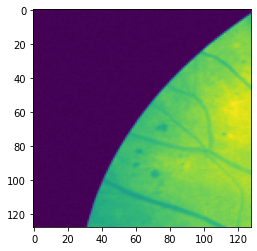

In [23]:
plt.imshow(orig_images[0])

In [24]:
masks=np.array([get_data(path) for path in mask])
masks.shape

(1242, 128, 128)

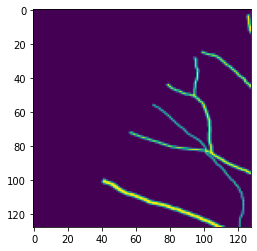

In [25]:
plt.imshow(masks[0])

In [26]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [27]:
masks.shape, orig_images.shape

((1242, 128, 128, 1), (1242, 128, 128, 1))

In [28]:
orig_images = orig_images / 255
masks = masks / 255

In [29]:
def get_unet():
    inputs = Input((128, 128, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [30]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_2[0][0]                  

In [31]:
model.fit(orig_images, masks, epochs = 10, batch_size= 16, shuffle = True, validation_split = 0.1)

Train on 1117 samples, validate on 125 samples
Epoch 1/10
1117/1117 [==============================] - 355s 317ms/step - loss: 0.5431 - accuracy: 0.8358 - val_loss: 0.2781 - val_accuracy: 0.9107
Epoch 2/10
1117/1117 [==============================] - 353s 316ms/step - loss: 0.2460 - accuracy: 0.8755 - val_loss: 0.1923 - val_accuracy: 0.9107
Epoch 3/10
1117/1117 [==============================] - 349s 312ms/step - loss: 0.2272 - accuracy: 0.8755 - val_loss: 0.1902 - val_accuracy: 0.9107
Epoch 4/10
1117/1117 [==============================] - 357s 320ms/step - loss: 0.2238 - accuracy: 0.8755 - val_loss: 0.1832 - val_accuracy: 0.9107
Epoch 5/10
1117/1117 [==============================] - 346s 310ms/step - loss: 0.2220 - accuracy: 0.8755 - val_loss: 0.1833 - val_accuracy: 0.9107
Epoch 6/10
1117/1117 [==============================] - 348s 312ms/step - loss: 0.2205 - accuracy: 0.8755 - val_loss: 0.1818 - val_accuracy: 0.9107
Epoch 7/10
1117/1117 [==============================] - 349s 312m

In [32]:
PATH_DRIVE= 'All_4//DRIVE//test'

In [33]:
t_images_DRIVE=glob.glob(os.path.join(PATH_DRIVE,'images','*.TIF'))

In [34]:
if not os.path.exists('.All_4/test/output_images'):
    os.makedirs('./All_4/test/output_images')
src = "./All_4/DRIVE/test/images/"
dst = "./All_4/test/output_images/"

In [35]:
cropheight=200
cropwidth = 200
k=-1
for file in t_images_DRIVE:
    k+=1
    im = Image.open(t_images_DRIVE[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_DRIVE[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_DRIVE[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_4//DRIVE//test\images\01_test.tif (0, 0, 200, 200)
All_4//DRIVE//test\images\01_test.tif (0, 200, 200, 400)
All_4//DRIVE//test\images\01_test.tif (0, 400, 200, 600)
All_4//DRIVE//test\images\01_test.tif (200, 0, 400, 200)
All_4//DRIVE//test\images\01_test.tif (200, 200, 400, 400)
All_4//DRIVE//test\images\01_test.tif (200, 400, 400, 600)
All_4//DRIVE//test\images\01_test.tif (400, 0, 600, 200)
All_4//DRIVE//test\images\01_test.tif (400, 200, 600, 400)
All_4//DRIVE//test\images\01_test.tif (400, 400, 600, 600)
All_4//DRIVE//test\images\02_test.tif (0, 0, 200, 200)
All_4//DRIVE//test\images\02_test.tif (0, 200, 200, 400)
All_4//DRIVE//test\images\02_test.tif (0, 400, 200, 600)
All_4//DRIVE//test\images\02_test.tif (200, 0, 400, 200)
All_4//DRIVE//test\images\02_test.tif (200, 200, 400, 400)
All_4//DRIVE//test\images\02_test.tif (200, 400, 400, 600)
All_4//DRIVE//test\images\02_test.tif (400, 0, 600, 200)
All_4//DRIVE//test\images\02_test.tif (400, 200, 600, 400)
All_4//DRIVE//test\im

All_4//DRIVE//test\images\17_test.tif (200, 200, 400, 400)
All_4//DRIVE//test\images\17_test.tif (200, 400, 400, 600)
All_4//DRIVE//test\images\17_test.tif (400, 0, 600, 200)
All_4//DRIVE//test\images\17_test.tif (400, 200, 600, 400)
All_4//DRIVE//test\images\17_test.tif (400, 400, 600, 600)
All_4//DRIVE//test\images\18_test.tif (0, 0, 200, 200)
All_4//DRIVE//test\images\18_test.tif (0, 200, 200, 400)
All_4//DRIVE//test\images\18_test.tif (0, 400, 200, 600)
All_4//DRIVE//test\images\18_test.tif (200, 0, 400, 200)
All_4//DRIVE//test\images\18_test.tif (200, 200, 400, 400)
All_4//DRIVE//test\images\18_test.tif (200, 400, 400, 600)
All_4//DRIVE//test\images\18_test.tif (400, 0, 600, 200)
All_4//DRIVE//test\images\18_test.tif (400, 200, 600, 400)
All_4//DRIVE//test\images\18_test.tif (400, 400, 600, 600)
All_4//DRIVE//test\images\19_test.tif (0, 0, 200, 200)
All_4//DRIVE//test\images\19_test.tif (0, 200, 200, 400)
All_4//DRIVE//test\images\19_test.tif (0, 400, 200, 600)
All_4//DRIVE//test\

In [36]:
PATH_DRIVE= 'All_4//Stare//test'

In [37]:
t_images_Stare=glob.glob(os.path.join(PATH_Stare,'images','*.TIF'))

In [38]:
src = "./All_4/Stare/test/images/"
dst = "./All_4/test/output_images/"

In [39]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images_Stare:
    k+=1
    im = Image.open(t_images_Stare[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_Stare[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_Stare[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./All_4/Stare/training\images\41_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\41_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\41_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\41_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\42_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\42_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\42_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\42_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\43_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\43_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\43_training.tif (350, 0, 700, 350)
./All_4/Stare/training\images\43_training.tif (350, 350, 700, 700)
./All_4/Stare/training\images\44_training.tif (0, 0, 350, 350)
./All_4/Stare/training\images\44_training.tif (0, 350, 350, 700)
./All_4/Stare/training\images\44_training.tif (350, 0, 700, 350)
./All_4/Stare/training\imag

In [40]:
PATH_ChaseDB= 'All_4//ChaseDB//test'

In [41]:
t_images_ChaseDB=glob.glob(os.path.join(PATH_ChaseDB,'images','*.JPG'))

In [42]:
src = "./All_4/ChaseDB/test/images/"
dst = "./All_4/test/output_images/"

In [43]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images_ChaseDB:
    k+=1
    im = Image.open(t_images_ChaseDB[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_ChaseDB[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_ChaseDB[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_4//ChaseDB//test\images\Image_14L.jpg (0, 0, 350, 350)
All_4//ChaseDB//test\images\Image_14L.jpg (0, 350, 350, 700)
All_4//ChaseDB//test\images\Image_14L.jpg (0, 700, 350, 1050)
All_4//ChaseDB//test\images\Image_14L.jpg (350, 0, 700, 350)
All_4//ChaseDB//test\images\Image_14L.jpg (350, 350, 700, 700)
All_4//ChaseDB//test\images\Image_14L.jpg (350, 700, 700, 1050)
All_4//ChaseDB//test\images\Image_14L.jpg (700, 0, 1050, 350)
All_4//ChaseDB//test\images\Image_14L.jpg (700, 350, 1050, 700)
All_4//ChaseDB//test\images\Image_14L.jpg (700, 700, 1050, 1050)
All_4//ChaseDB//test\images\Image_14R.jpg (0, 0, 350, 350)
All_4//ChaseDB//test\images\Image_14R.jpg (0, 350, 350, 700)
All_4//ChaseDB//test\images\Image_14R.jpg (0, 700, 350, 1050)
All_4//ChaseDB//test\images\Image_14R.jpg (350, 0, 700, 350)
All_4//ChaseDB//test\images\Image_14R.jpg (350, 350, 700, 700)
All_4//ChaseDB//test\images\Image_14R.jpg (350, 700, 700, 1050)
All_4//ChaseDB//test\images\Image_14R.jpg (700, 0, 1050, 350)
All_4//

In [44]:
PATH_HRF= 'All_4//HRF//test'

In [45]:
t_images_HRF=glob.glob(os.path.join(PATH_HRF,'images','*.jpg'))

In [46]:
src = "./All_4/HRF/test/images/"
dst = "./All_4/test/output_images/"

In [47]:
cropheight=900
cropwidth = 600
k=-1
for file in t_images_HRF:
    k+=1
    im = Image.open(t_images_HRF[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images_HRF[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images_HRF[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

All_4//HRF//test\images\15_dr.JPG (0, 0, 600, 900)
All_4//HRF//test\images\15_dr.JPG (0, 900, 600, 1800)
All_4//HRF//test\images\15_dr.JPG (0, 1800, 600, 2700)
All_4//HRF//test\images\15_dr.JPG (600, 0, 1200, 900)
All_4//HRF//test\images\15_dr.JPG (600, 900, 1200, 1800)
All_4//HRF//test\images\15_dr.JPG (600, 1800, 1200, 2700)
All_4//HRF//test\images\15_dr.JPG (1200, 0, 1800, 900)
All_4//HRF//test\images\15_dr.JPG (1200, 900, 1800, 1800)
All_4//HRF//test\images\15_dr.JPG (1200, 1800, 1800, 2700)
All_4//HRF//test\images\15_dr.JPG (1800, 0, 2400, 900)
All_4//HRF//test\images\15_dr.JPG (1800, 900, 2400, 1800)
All_4//HRF//test\images\15_dr.JPG (1800, 1800, 2400, 2700)
All_4//HRF//test\images\15_dr.JPG (2400, 0, 3000, 900)
All_4//HRF//test\images\15_dr.JPG (2400, 900, 3000, 1800)
All_4//HRF//test\images\15_dr.JPG (2400, 1800, 3000, 2700)
All_4//HRF//test\images\15_dr.JPG (3000, 0, 3600, 900)
All_4//HRF//test\images\15_dr.JPG (3000, 900, 3600, 1800)
All_4//HRF//test\images\15_dr.JPG (3000, 1

In [48]:
PATH2 = 'All_4//test'

In [49]:
t_images=glob.glob(os.path.join(PATH2,'output_images','*.tiff'))

In [50]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(252, 128, 128)

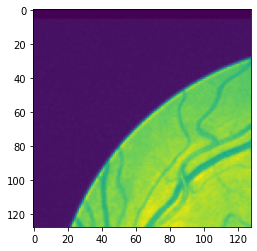

In [51]:
plt.imshow(test_images[0])

In [52]:
test_images = np.expand_dims(test_images, axis = -1)

In [53]:
test_images.shape

(252, 128, 128, 1)

In [54]:
test_images = test_images / 255

In [55]:
imgs_mask_test = model.predict(test_images, verbose=1)

252/252 [==============================] - 20s 81ms/step


In [56]:
#count=0
#idx=0
#DIR="C:\\Users\\subah\\retinaunetdrivecrop\\test\\predicted_masks"
#for i in os.listdir(DIR):
    #image=cv2.imread(os.path.join(DIR, i))
    #blurred_image = motion_blur(image)
    #cv2.imwrite('/path/to/destination/image'+str(count)+'.png',blurred_image) 
    #count+=1
    #i = imgs_mask_test[idx]
    #i = i[:, :, 0]
    #i.shape
    #plt.imshow(imgs_mask_test[idx], cmap='gray')
    #plt.imshow(i, cmap='gray')
    #Image.fromarray(np.uint8(cm.gist_earth(imgs_mask_test[idx])))
    #plt.imshow(imgs_mask_test[idx], cmap='gray')

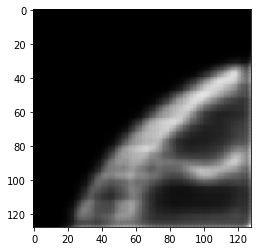

In [57]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [58]:
yp = np.round(imgs_mask_test,0)

In [59]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

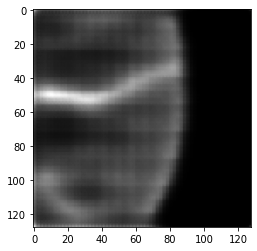

In [60]:
plt.imshow(i, cmap='gray')


##### 